#### import config file and load defaults

In [306]:
def ConfigSectionMap(section):
    #print(section)
    dict1 = {}
    options = config.options(section)
    #print(options)
    for option in options:
        try:
            dict1[option] = config.get(section, option)
            if dict1[option] == -1:
                DebugPrint("skip: %s" % option)
        except:
            print("exception on %s!" % option)
            dict1[option] = None
    return dict1

import configparser
config = configparser.ConfigParser()
config.read('MLPConfig.ini')
print(config.sections())
try:
    count1 = int(ConfigSectionMap("Layer1")['count1'])
    activation1 = ConfigSectionMap("Layer1")['activation1']
    count2 = int(ConfigSectionMap("Layer2")['count2'])
    activation2 = ConfigSectionMap("Layer2")['activation2']
    count3 = int(ConfigSectionMap("Layer3")['count3'])
    activation3 = ConfigSectionMap("Layer3")['activation3']
    optimizer = ConfigSectionMap("Compile")['optimizer']
    loss = ConfigSectionMap("Compile")['loss']
    metrics = ConfigSectionMap("Compile")['metrics']
    batch_size = int(ConfigSectionMap("Others")['batch_size'])
    epochs = int(ConfigSectionMap("Others")['epoch'])
    
    print("All parameters loaded from config file")
    print("Count and activation for Layer 1 :",count1, activation1)
    print("Count and activation for Layer 2 :",count2, activation2)
    print("Count and activation for Layer 3 :",count3, activation3)
    print("Loss :",loss)
    print("Metrics :",metrics)
    print("Optimizer :",optimizer)
    print("Batch Size :",batch_size)
    print("Epochs :",epochs)
except:
    print("Incorrect parameters")

['Layer1', 'Layer2', 'Layer3', 'Compile', 'Others']
All parameters loaded from config file
Count and activation for Layer 1 : 64 relu
Count and activation for Layer 2 : 24 relu
Count and activation for Layer 3 : 10 softmax
Loss : categorical_crossentropy
Metrics : accuracy
Optimizer : rmsprop
Batch Size : 500
Epochs : 100


#### Load cifar10 dataset and view metrics

In [296]:
from keras.datasets import cifar10
(train_data, train_labels), (test_data, test_labels) = cifar10.load_data()
print("Training data length :", len(train_data))
print("Test data length :",len(test_data))
print("Data shape : ",train_data.shape)
print("Max value of single cell :",train_data[0].max())
print("No of labels :",train_labels.max() + 1)

#print("Sample data :",train_data[0])

Training data length : 50000
Test data length : 10000
Data shape :  (50000, 32, 32, 3)
Max value of single cell : 255
No of labels : 10


#### Data preprocessing

In [297]:
import keras.utils

#reshape 32x32x3 tensor to 3072x1,convert to data type float32 and normalizing values between 0 and 1
train_data = train_data.reshape(50000, 3072)
test_data = test_data.reshape(10000, 3072)
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
print("Data reshaped :",train_data.shape)
train_data/=255
test_data/=255
print("Data normalized between range",train_data.min(),"and",train_data.max())
print("Sample data :",train_data[0])

#vectorizing the labels
train_labels = keras.utils.to_categorical(train_labels,train_labels.max() + 1)
test_labels = keras.utils.to_categorical(test_labels,test_labels.max() + 1)
print("Labels reshaped :",train_labels.shape)
print("Sample labels :",train_labels[0])








Data reshaped : (50000, 3072)
Data normalized between range 0.0 and 1.0
Sample data : [ 0.23137255  0.24313726  0.24705882 ...,  0.48235294  0.36078432
  0.28235295]
Labels reshaped : (50000, 10)
Sample labels : [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]


#### splitting data and labels for creating validation set

In [298]:
val_data = train_data[:10000]
partial_train = train_data[10000:]
val_labels = train_labels[:10000]
partial_labels = train_labels[10000:]


#### build,compile and fit model

In [299]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(count1, activation=activation1, input_shape=(3072,)))
model.add(layers.Dense(count2, activation=activation2))
model.add(layers.Dense(count3, activation=activation3))
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=[metrics])
history = model.fit(partial_train, partial_labels,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(val_data,val_labels))

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 3s 75us/step - loss: 2.2878 - acc: 0.1439 - val_loss: 2.1912 - val_acc: 0.1794
Epoch 2/100
40000/40000 [==============================] - 2s 60us/step - loss: 2.1121 - acc: 0.2153 - val_loss: 2.0466 - val_acc: 0.2482
Epoch 3/100
40000/40000 [==============================] - 2s 59us/step - loss: 2.0080 - acc: 0.2662 - val_loss: 1.9720 - val_acc: 0.2843
Epoch 4/100
40000/40000 [==============================] - 2s 59us/step - loss: 1.9431 - acc: 0.2937 - val_loss: 1.8712 - val_acc: 0.3272
Epoch 5/100
40000/40000 [==============================] - 2s 59us/step - loss: 1.8995 - acc: 0.3158 - val_loss: 1.8918 - val_acc: 0.3121
Epoch 6/100
40000/40000 [==============================] - 2s 59us/step - loss: 1.8631 - acc: 0.3310 - val_loss: 1.8243 - val_acc: 0.3388
Epoch 7/100
40000/40000 [==============================] - 2s 60us/step - loss: 1.8341 - acc: 0.3428 - val_loss: 1.8100 - 

#### plot the loss

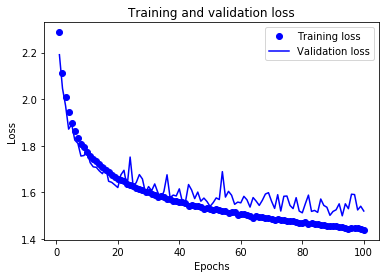

In [300]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### plot the accuracy

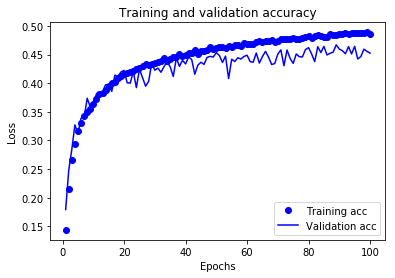

In [301]:
plt.clf()   # clear figure

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [302]:
import numpy as np
results = model.evaluate(test_data,test_labels)
print("Loss and accuracy for test data :",results)

predictions = model.predict(test_data)
print("Predicted label for test sample :",np.argmax(predictions[0]))
expected_label = [i for i, j in enumerate(test_labels[0]) if j == max(test_labels[0])]
print("Actual label for test sample :", expected_label)

10000/10000 [==============================] - 1s 65us/step
Loss and accuracy for test data : [1.5338520656585692, 0.4506]
Predicted label for test sample : 3
Actual label for test sample : [3]


In [303]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8842530236698686820
]
